In [ ]:
# Fist install the library and download the models from github
# !pip install transformers
!pip install transformers
# !wget https://users.dcc.uchile.cl/~jperez/beto/cased_2M/pytorch_weights.tar.gz 
# !wget https://users.dcc.uchile.cl/~jperez/beto/cased_2M/vocab.txt 
# !wget https://users.dcc.uchile.cl/~jperez/beto/cased_2M/config.json 
# !tar -xzvf pytorch_weights.tar.gz
# !mv config.json pytorch/.
# !mv vocab.txt pytorch/.

     |████████████████████████████████| 3.8 MB 14.4 MB/s 
     |████████████████████████████████| 895 kB 68.1 MB/s 
     |████████████████████████████████| 596 kB 44.9 MB/s 
     |████████████████████████████████| 6.5 MB 38.2 MB/s 
     |████████████████████████████████| 67 kB 5.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open("/content/drive/MyDrive/dataa/D3_Latest.txt","r")as a:
	texts = a.readlines()

In [ ]:
with open("/content/drive/MyDrive/dataa/Trac2_test.txt","r")as a:
	texts_test = a.readlines()

In [ ]:
import pickle


In [ ]:
with open('/content/drive/MyDrive/dataa/D3_Labels_Latest.pkl', 'rb') as f:
  Labels = pickle.load(f)

In [ ]:
# Labels

In [ ]:
with open('/content/drive/MyDrive/dataa/Trac2_test_Labels.pkl', 'rb') as f:
  Labels_test = pickle.load(f)

In [ ]:
# Labels_test

In [ ]:
import pandas as pd

In [ ]:
train = pd.DataFrame(zip(texts,Labels),columns=['Text','Label'])

In [ ]:
testt = pd.DataFrame(zip(texts_test,Labels_test),columns=['Text','Label'])

In [ ]:
# max_size =train["Label"].value_counts().max()


# lst = [train]
# for class_index, group in train.groupby('Label'):
#     lst.append(group.sample(max_size-len(group), replace=True))
# train_new = pd.concat(lst)

In [ ]:
# import pandas as pd
# train = pd.read_csv("/content/augmented_trac2.csv")
# # testt = pd.read_excel("/content/test.xlsx")

In [ ]:
train.head()

,Text,Label
0,bollywood film dekhne ke samay logic ghar mein...,1
1,chutiya\n,1
2,us jaat bnde ka khene ka matlab tha mar daluga...,2
3,is cancer feminist yeh sahi hai but iska matla...,2
4,amrit anand ab to jude hi he unako bolo judane\n,1


In [ ]:
train.columns=['Text','Label']

In [ ]:
from transformers import (
   AutoConfig,
   AutoTokenizer,
   TFAutoModelForSequenceClassification,
   AdamW,
   glue_convert_examples_to_features
)
import tensorflow as tf
import tensorflow_datasets as tfds
import json

In [ ]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
# RANDOM_SEED = 42
# np.random.seed(RANDOM_SEED)
# torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
 
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1949788207793465226
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 13190823936
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3310427090976392711
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
!pip3 install sentencepiece


     |████████████████████████████████| 1.2 MB 14.4 MB/s 


In [ ]:
from transformers import AutoModel, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('ai4bharat/indic-bert')
model = AutoModel.from_pretrained('ai4bharat/indic-bert')


Some weights of the model checkpoint at ai4bharat/indic-bert were not used when initializing AlbertModel: ['predictions.LayerNorm.weight', 'predictions.dense.weight', 'predictions.LayerNorm.bias', 'predictions.decoder.weight', 'sop_classifier.classifier.weight', 'sop_classifier.classifier.bias', 'predictions.bias', 'predictions.dense.bias', 'predictions.decoder.bias']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# from transformers import BertModel
# model = Auto.from_pretrained('/content/pytorch')

In [ ]:
train.dropna(inplace=True)

In [ ]:
train['Text'] = train['Text'].apply(lambda x:x.replace('\n',''))

In [ ]:
# train_new.dropna(inplace=True)
# train_new['Text'] = train_new['Text'].apply(lambda x:x.replace('\n',''))

In [ ]:
train.shape

(3984, 2)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# train['Label'] = labelencoder.fit_transform(train['Label'])

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# train_new['Label'] = labelencoder.fit_transform(train_new['Label'])

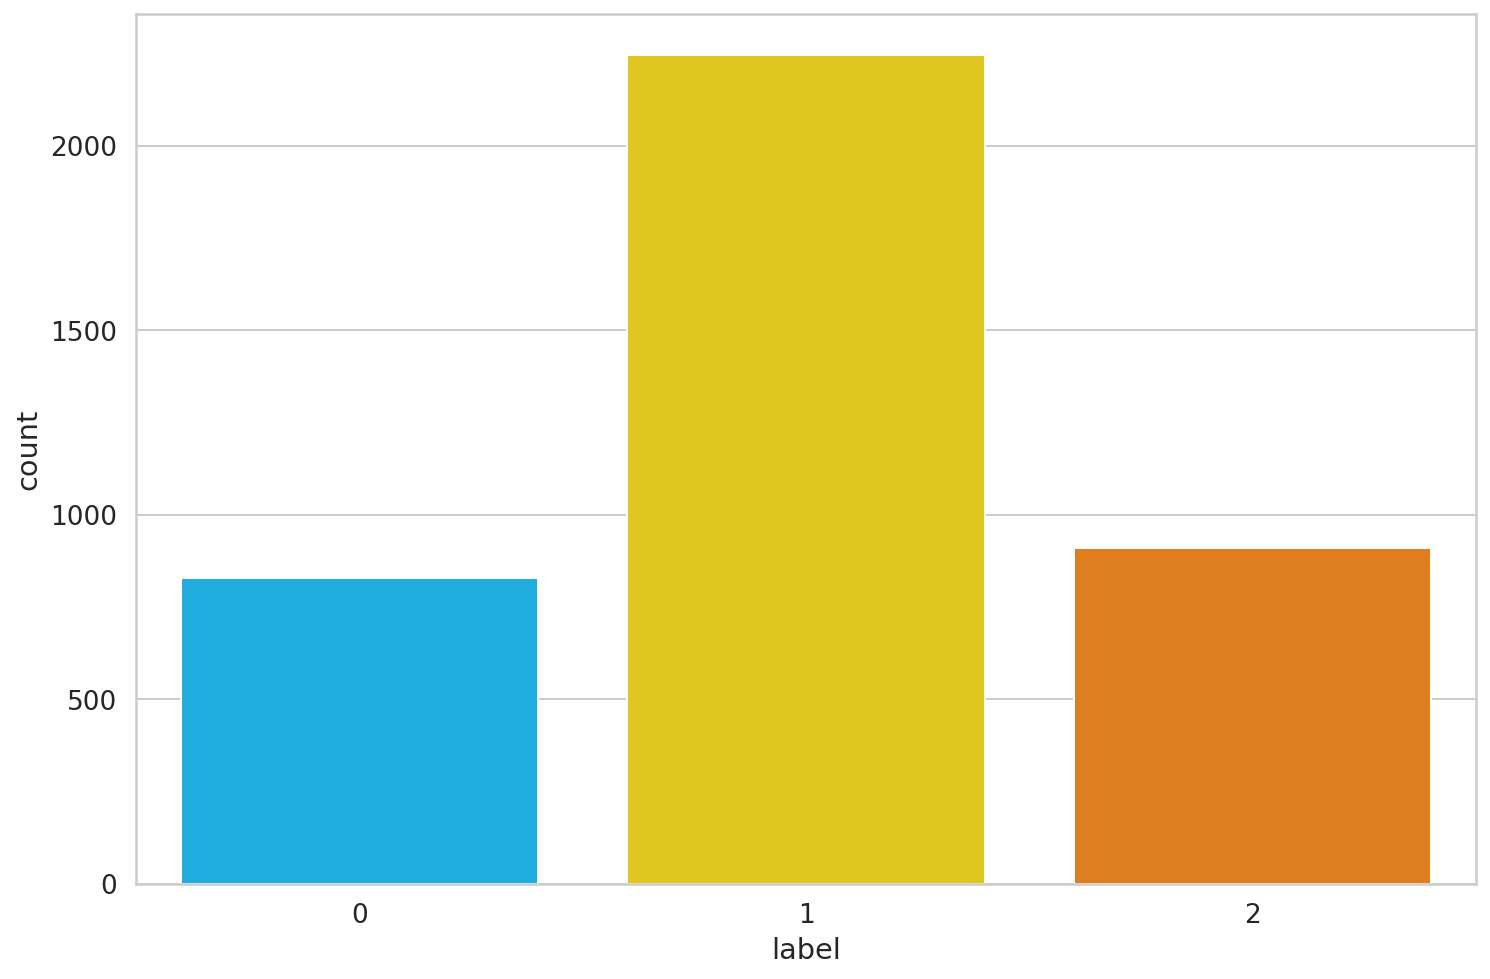

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(train.Label)
plt.xlabel('label');

In [ ]:
# model_name = '/content/pytorch/hindi-vocab.txt'
# tokenizer = BertTokenizer.from_pretrained(model_name, truncation=True)

In [ ]:
import codecs,string
def detect_language(character):
    maxchar = max(character)
    if u'\u0900' <= maxchar <= u'\u097f':
        return 'hindi'
    if maxchar.isalpha():
      return "English"

In [ ]:
!git clone https://github.com/libindic/indic-trans.git

Cloning into 'indic-trans'...
remote: Enumerating objects: 2214, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 2214 (delta 2), reused 0 (delta 0), pack-reused 2206
Receiving objects: 100% (2214/2214), 516.51 MiB | 10.33 MiB/s, done.
Resolving deltas: 100% (1096/1096), done.
Checking out files: 100% (719/719), done.


In [ ]:
cd indic-trans/


/content/indic-trans


In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 113 kB 14.1 MB/s 


In [ ]:
!python3 setup.py build_ext --inplace

Compiling indictrans/_decode/beamsearch.pyx because it changed.
Compiling indictrans/_decode/viterbi.pyx because it changed.
[1/2] Cythonizing indictrans/_decode/beamsearch.pyx
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/indic-trans/indictrans/_decode/beamsearch.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/2] Cythonizing indictrans/_decode/viterbi.pyx
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/indic-trans/indictrans/_decode/viterbi.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the und

In [ ]:
from indictrans import Transliterator
trn = Transliterator(source='eng', target='hin', build_lookup=True)

In [ ]:
import re

In [ ]:
for i in train.Text.values:
  try:
    isEng = detect_language(i)
    if isEng == "English":
      train['Text'].replace(i,trn.transform(i),inplace = True)
  except:
    train['Text'].replace(i,i,inplace = True)

In [ ]:
for i in testt.Text.values:
  try:
    isEng = detect_language(i)
    if isEng == "English":
      testt['Text'].replace(i,trn.transform(i),inplace = True)
  except:
    testt['Text'].replace(i,i,inplace = True)

In [ ]:
import tokenizers

In [ ]:
sample_txt = 'Yeh ek vkya hai'

In [ ]:
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: Yeh ek vkya hai
   Tokens: ['▁ye', 'h', '▁', 'ek', '▁v', 'kya', '▁hai']
Token IDs: [121067, 3343, 8, 19216, 10048, 107553, 31279]


In [ ]:
tokenizer.sep_token, tokenizer.sep_token_id

('[SEP]', 3)

In [ ]:
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=90,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
)

encoding.keys()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


dict_keys(['input_ids', 'attention_mask'])

In [ ]:
token_lens = []

for txt in train.Text:
  tokens = tokenizer.encode(txt,truncation=True, max_length=512)
  token_lens.append(len(tokens))

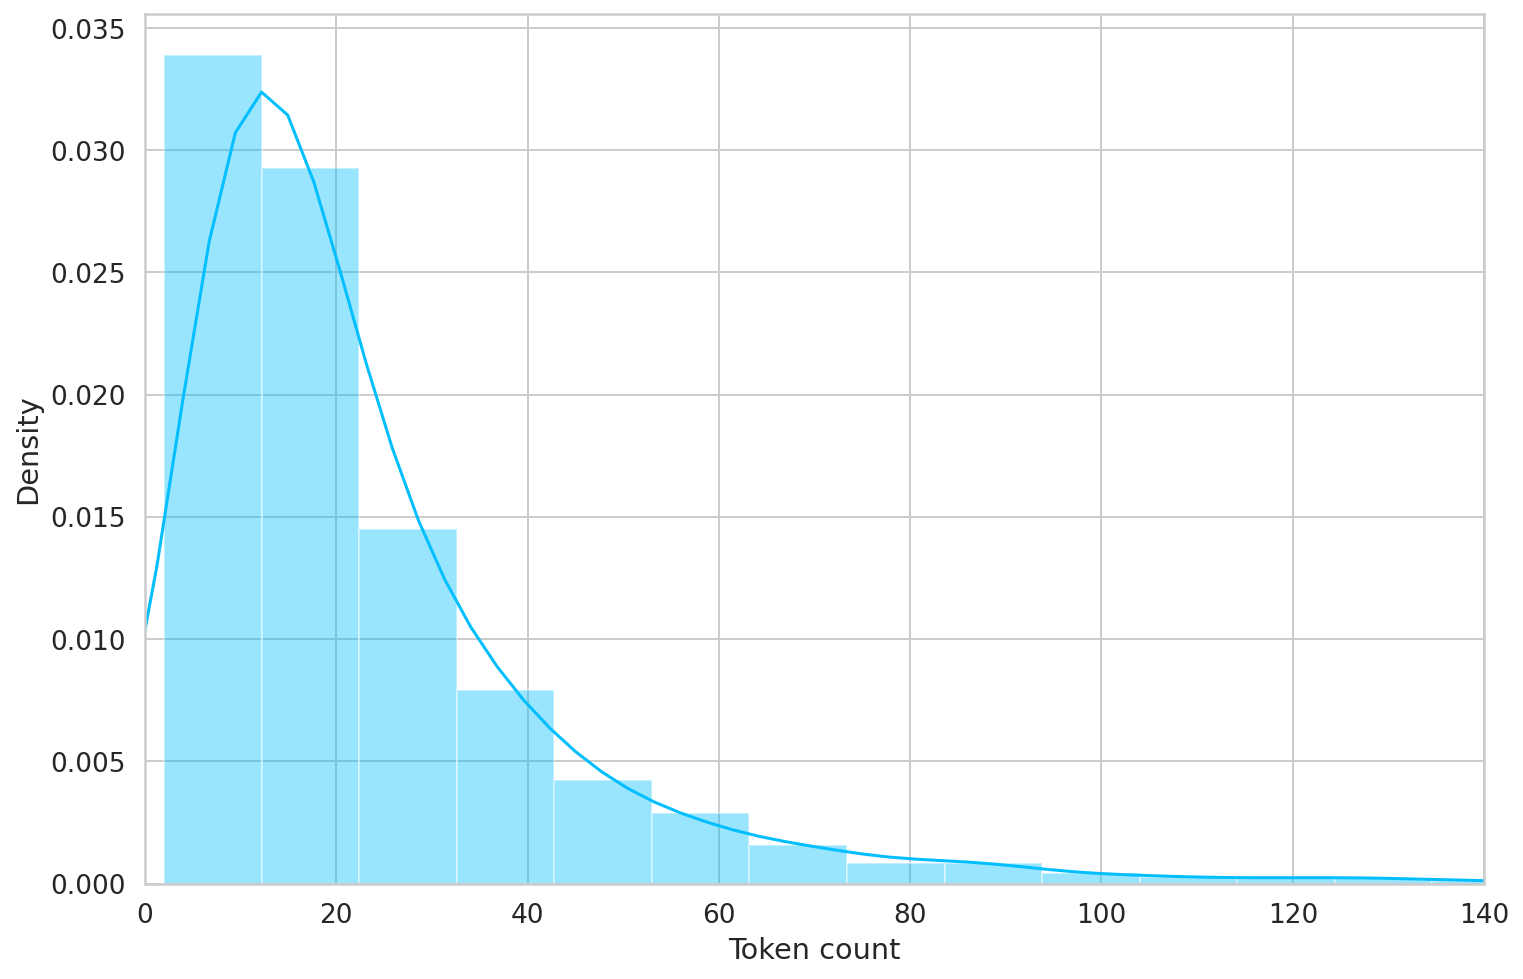

In [ ]:
sns.distplot(token_lens)
plt.xlim([0, 140]);
plt.xlabel('Token count');

In [ ]:
MAX_LEN = 72

In [ ]:
MAX_LEN = 64

In [ ]:
MAX_LEN = 36

In [ ]:
MAX_LEN = 54

In [ ]:
class GPReviewDataset(Dataset):
  def __init__(self, Text, Label, tokenizer, max_len):
    self.Text = Text
    self.Label = Label
    self.tokenizer = tokenizer
    self.max_len = max_len
  def __len__(self):
    return len(self.Text)
  def __getitem__(self, item):
    Text = str(self.Text[item])
    Label = self.Label[item]
    encoding = self.tokenizer.encode_plus(
      Text,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      truncation=True,
      return_tensors='pt',
    )
    return {
      'text': Text,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'Label': torch.tensor(Label, dtype=torch.long)
    }

In [ ]:
# df_train, df_val = train_test_split(
#   train_new,
#   test_size=0.001,
#   stratify = train_new.Label.values,
#   random_state=42
# )
# # df_val, df_test = train_test_split(
# #   df_test,
# #   test_size=0.08,
# #   stratify = df_test.Label.values,
# #   random_state=42
# # )
# df_train.shape, df_val.shape

In [ ]:
df_train, df_val = train_test_split(
  train,
  test_size=0.20,
  stratify = train.Label.values,
  random_state=42
)
df_val, df_test = train_test_split(
  df_val,
  test_size=0.50,
  stratify = df_val.Label.values,
  random_state=42
)


df_train.shape, df_val.shape

((3187, 2), (398, 2))

In [ ]:

# df_train.to_csv("df_train_0.02.csv")
# df_val.to_csv("df_val_0.02.csv") 
# df_test.to_csv("df_test_0.02.csv")

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    Text=df.Text.to_numpy(),
    Label=df.Label.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )
  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

In [ ]:
BATCH_SIZE = 64
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
# test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:


# data = next(iter(train_data_loader))
# data.keys()

In [ ]:
# data = next(iter(train_data_loader))
# data.keys()
# print(data['input_ids'].shape)
# print(data['attention_mask'].shape)
# print(data['Label'].shape)

In [ ]:
class SentimentClassifier(nn.Module):
  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = AutoModel.from_pretrained('ai4bharat/indic-bert')
    
    self.drop = nn.Dropout(p=0.33)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask,
      return_dict=False)
    output = self.drop(pooled_output)
    return self.out(output)

In [ ]:
import gc

In [ ]:
# bert = BertModel.from_pretrained('/content/pytorch')
# conv = nn.Conv2d(in_channels=13, out_channels=13, kernel_size=(3, 768), padding=True)
# relu = nn.ReLU()
# pool = nn.MaxPool2d(kernel_size=3, stride=1)
# dropout = nn.Dropout(0.1)
# fc = nn.Linear(676, 3) # before : 442 with max_length 36 # 806 with max_length 64 1534 for 120 676 for 54
# flat = nn.Flatten()
# softmax = nn.LogSoftmax(dim=1)

In [ ]:
# input_ids = data['input_ids']

# attention_mask = data['attention_mask']

# _,_,output = bert(input_ids = input_ids, attention_mask=attention_mask, output_hidden_states=True)

# x = torch.transpose(torch.cat(tuple([t.unsqueeze(0) for t in output]), 0), 0, 1)


# x = dropout(x)

# x = conv(x)


# # x= pool(x)


# flat = nn.Flatten()

# flat(x).size()

In [ ]:
# class BERT_Arch(nn.Module):

#     def __init__(self, bert):
#         super(BERT_Arch, self).__init__()
#         self.bert = BertModel.from_pretrained('/content/pytorch')
#         self.conv = nn.Conv2d(in_channels=13, out_channels=13, kernel_size=(3, 768), padding=True)
#         self.relu = nn.ReLU()
#         self.pool = nn.MaxPool2d(kernel_size=3, stride=1)
#         self.dropout = nn.Dropout(0.20)
#         self.fc = nn.Linear(442, 3) # before : 442 with max_length 36 # 806 with max_length 64 1534 for 120 676 for 54
#         self.flat = nn.Flatten()
#         self.softmax = nn.Softmax(dim=1)

#     def forward(self, input_ids, attention_mask):
#         _,_, all_layers = self.bert(input_ids = input_ids, attention_mask=attention_mask, output_hidden_states=True)
#         # all_layers  = [13, 32, 64, 768]
#         x = torch.transpose(torch.cat(tuple([t.unsqueeze(0) for t in all_layers]), 0), 0, 1)
#         del all_layers
#         gc.collect()
#         torch.cuda.empty_cache()
#         x = self.pool(self.dropout(self.relu(self.conv(self.dropout(x)))))
#         x = self.fc(self.dropout(self.flat(self.dropout(x))))
#         return self.softmax(x)

In [ ]:
# class BERT_Arch(nn.Module):

#     def __init__(self, bert):
#         super(BERT_Arch, self).__init__()
#         self.bert = BertModel.from_pretrained('/content/pytorch')
#         self.conv = nn.Conv2d(in_channels=13, out_channels=13, kernel_size=(3, 768), padding=True)
#         self.relu = nn.ReLU()
#         self.pool = nn.MaxPool2d(kernel_size=3, stride=1)
#         self.dropout = nn.Dropout(0.15)
#         self.fc = nn.Linear(2496, 3) # before : 442 with max_length 36 # 806 with max_length 64 1534 for 120 676 for 54
#         self.flat = nn.Flatten()
#         self.softmax = nn.Softmax(dim=1)

#     def forward(self, input_ids, attention_mask):
#         _,_, all_layers = self.bert(input_ids = input_ids, attention_mask=attention_mask, output_hidden_states=True)
#         # all_layers  = [13, 32, 64, 768]
#         x = torch.transpose(torch.cat(tuple([t.unsqueeze(0) for t in all_layers]), 0), 0, 1)
#         del all_layers
#         gc.collect()
#         torch.cuda.empty_cache()
#         x = self.dropout(self.relu(self.conv(self.dropout(x))))
#         x = self.fc(self.dropout(self.flat(self.dropout(x))))
#         return self.softmax(x)

In [ ]:
train.head()

,Text,Label
0,बॉलिवुड फिल्म देखने के समय लॉजिक घर मैं चोरके ...,1
1,चुटिया,1
2,उस जात बन्दे का खेने का मतलब था मार डालुगा उसे...,2
3,इस कन्सर फेमिनिस्ट यह सही हैं बुत इसका मतलब ये...,2
4,अमृत आनंद अब तो जुड़े ही है उनको बोलो जुड़ने,1


In [ ]:
train['Label'].value_counts()

1    2245
2     910
0     829
Name: Label, dtype: int64

In [ ]:
n_classes = 3
class_names = ['0','1','2']

In [ ]:

modell = SentimentClassifier(len(class_names))
modell = modell.to(device)

Some weights of the model checkpoint at ai4bharat/indic-bert were not used when initializing AlbertModel: ['predictions.LayerNorm.weight', 'predictions.dense.weight', 'predictions.LayerNorm.bias', 'predictions.decoder.weight', 'sop_classifier.classifier.weight', 'sop_classifier.classifier.bias', 'predictions.bias', 'predictions.dense.bias', 'predictions.decoder.bias']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:


import math

In [ ]:
EPOCHS = 3
optimizer = AdamW(modell.parameters(), lr=2e-5, correct_bias=True)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

In [ ]:
loss_fn = nn.CrossEntropyLoss().to(device)

In [ ]:

def train_epoch(
  modell,
  data_loader,
  loss_fn,
  optimizer,
  device,
  scheduler,
  n_examples):
  modell = modell.train()
  losses = []
  correct_predictions = 0
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    Label = d["Label"].to(device)
    outputs = modell(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    
    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, Label)
    correct_predictions += torch.sum(preds == Label)
    losses.append(loss.item())
    loss.backward()
    nn.utils.clip_grad_norm_(modell.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()
  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
def eval_model(modell, data_loader, loss_fn, device, n_examples):
  modell = modell.eval()
  losses = []
  correct_predictions = 0
  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      Label = d["Label"].to(device)
      outputs = modell(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      loss = loss_fn(outputs, Label)
      correct_predictions += torch.sum(preds == Label)
      losses.append(loss.item())
  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:

%%time
history = defaultdict(list)
best_accuracy = 0
for epoch in range(EPOCHS):
  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)
  train_acc, train_loss = train_epoch(
    modell,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(df_train)
  )
  print(f'Train loss {train_loss} accuracy {train_acc}')
  val_acc, val_loss = eval_model(
    modell,
    val_data_loader,
    loss_fn,
    device,
    len(df_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()
  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)
  if val_acc > best_accuracy:
    torch.save(modell.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/3
----------
Train loss 1.027215566635132 accuracy 0.5092563539378726
Val   loss 0.9549960664340428 accuracy 0.5628140703517588

Epoch 2/3
----------
Train loss 0.9410256731510163 accuracy 0.5635393787260746
Val   loss 0.928107236112867 accuracy 0.5628140703517588

Epoch 3/3
----------
Train loss 0.916309825181961 accuracy 0.5635393787260746
Val   loss 0.9188054289136615 accuracy 0.5628140703517588

CPU times: user 1min 29s, sys: 1.66 s, total: 1min 30s
Wall time: 1min 39s


In [ ]:
# !cp /content/best_model_state.bin /content/drive/MyDrive/fihindibert

In [ ]:
# !mkdir /content/drive/MyDrive/ftb5

In [ ]:
# modell.bert.save_pretrained("/content/drive/MyDrive/ftb5")

In [ ]:
# modell.save(modell, '/content/drive/MyDrive/fihindibert/model.bin')

In [ ]:
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
test_acc, _ = eval_model(
  modell,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)
test_acc.item()

0.5639097744360901

In [ ]:
actual_test_data_loader = create_data_loader(testt, tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
actual_test_acc, _ = eval_model(
  modell,
  actual_test_data_loader,
  loss_fn,
  device,
  len(testt)
)
actual_test_acc.item()

0.27083333333333337

In [ ]:
def get_predictions(modell, data_loader):
  modell = modell.eval()
  review_texts = []
  predictions = []
  prediction_probs = []
  real_values = []
  with torch.no_grad():
    for d in data_loader:
      text = d["text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      Label = d["Label"].to(device)
      outputs = modell(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      text.extend(text)
      predictions.extend(preds)
      prediction_probs.extend(outputs)
      real_values.extend(Label)
  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return text, predictions, prediction_probs, real_values

In [ ]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  modell,
  test_data_loader
)

In [ ]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  modell,
  actual_test_data_loader
)

# **TRAC2**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       191
           1       0.27      1.00      0.43       325
           2       0.00      0.00      0.00       684

    accuracy                           0.27      1200
   macro avg       0.09      0.33      0.14      1200
weighted avg       0.07      0.27      0.12      1200



With Translitetation

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       191
           1       0.27      1.00      0.43       325
           2       0.00      0.00      0.00       684

    accuracy                           0.27      1200
   macro avg       0.09      0.33      0.14      1200
weighted avg       0.07      0.27      0.12      1200



# **Hate Speech**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       291
           1       0.00      0.00      0.00       166

    accuracy                           0.64       457
   macro avg       0.32      0.50      0.39       457
weighted avg       0.41      0.64      0.50       457



With Transliteration

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       291
           1       0.00      0.00      0.00       166

    accuracy                           0.64       457
   macro avg       0.32      0.50      0.39       457
weighted avg       0.41      0.64      0.50       457



# **HOT**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       112
           1       0.00      0.00      0.00        30
           2       0.55      1.00      0.71       177

    accuracy                           0.55       319
   macro avg       0.18      0.33      0.24       319
weighted avg       0.31      0.55      0.40       319



With Transliteration

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.22      0.34       112
           1       0.00      0.00      0.00        30
           2       0.60      0.96      0.74       177

    accuracy                           0.61       319
   macro avg       0.43      0.39      0.36       319
weighted avg       0.57      0.61      0.53       319

